In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [5]:
Auto = load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [16]:
allvars = Auto[["horsepower"]]
y= Auto["mpg"]

X = MS(allvars).fit_transform(Auto)
model = sm.OLS(y,X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        01:37:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
RSE = np.sqrt(result.mse_resid)
Relativeerror= (RSE/np.mean(y))*100
print(f"Relative error={Relativeerror}, RSE value = {RSE}")



Relative error=20.923714066914833, RSE value = 4.90575691954594


In [32]:
Testset=pd.DataFrame({'horsepower':[98]})
newX = sm.add_constant(Testset,has_constant='add')
newprediction= result.get_prediction(newX)
newprediction.summary_frame(alpha=0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


<b>i)</b> Since the p value is < 0.05 this means that a relationship between the predictor (horsepower) and response (mpg) exists</n> 


<b>ii)</b> rsq tells us that roughly 60 % of the variation in mpg is described by horsepower , decent fit , explains 60 percent of the variability, the RSE value is 4.9 which givves us a standard relative error of 20% , meaning our predictions deviate from the actual value by 20 % of th average mpg, if avg is 23 then our predictions will deviate about 4.9 from it.

<b>iii)</b> the relationship is negative as we can see from the horsepower coefficient, meaning , with an increase in the horsepower the value of mpg decreases 

<b>iv)</b> for a horsepower of 98 , the predicted mean value is 24.4 , the confidence and predicted interval both can be referenced above

/tmp/ipykernel_978/1011505442.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, result.params[0],result.params[1] , 'r--');


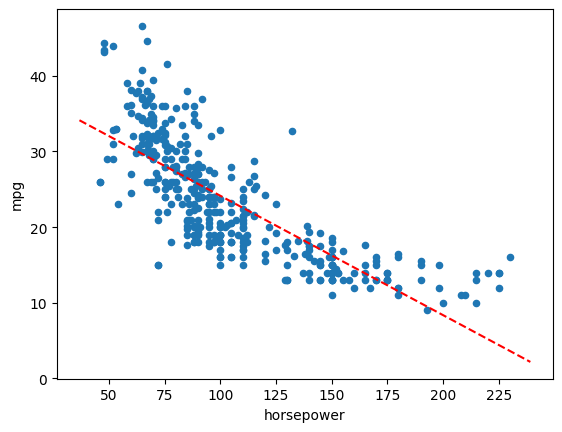

In [34]:
def abline(ax, b , m, *arge):
    "Add a line with a slo[pe m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m * xlim[1]+b]
    ax.plot(xlim, ylim, *arge)




ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, result.params[0],result.params[1] , 'r--');

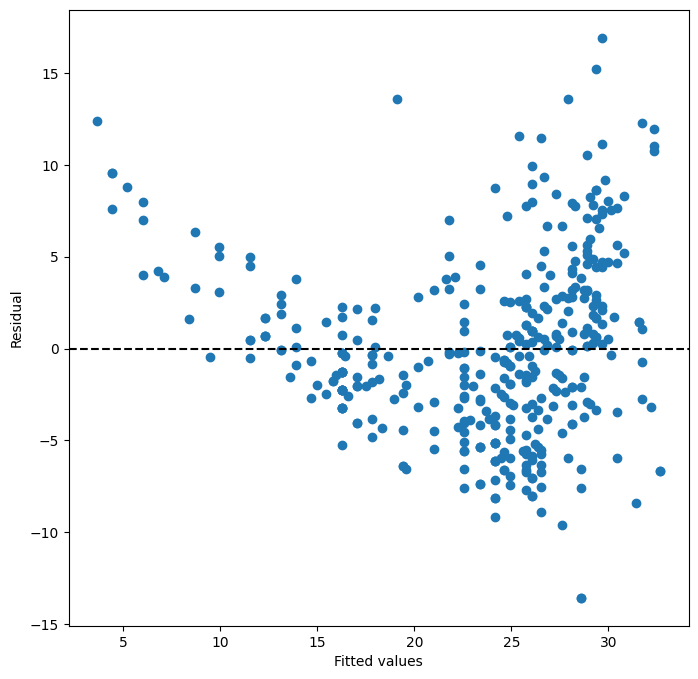

In [35]:
ax= subplots(figsize=(8,8))[1]
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(c="k", ls = "--");

We can clearly see non linearity in the plot , meaning our model is not that good , the magnitude of residual (y-yhat) is too much in some cases

<b>9</b>